In [36]:
pip install mediapipe

   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/51.0 MB ? eta -:--:--
   - -------------------------------------- 1.3/51.0 MB 4.0 MB/s eta 0:00:13
   - -------------------------------------- 2.1/51.0 MB 3.8 MB/s eta 0:00:13
   -- ------------------------------------- 2.9/51.0 MB 3.9 MB/s eta 0:00:13
   -- ------------------------------------- 3.7/51.0 MB 3.9 MB/s eta 0:00:13
   --- ------------------------------------ 4.5/51.0 MB 3.7 MB/s eta 0:00:13
   ---- ----------------------------------- 5.2/51.0 MB 3.7 MB/s eta 0:00:13
   ---- ----------------------------------- 6.0/51.0 MB 3.8 MB/s eta 0:00:12
   ----- ---------------------------------- 6.8/51.0 MB 3.7 MB/s eta 0:00:12
   ----- ---------------------------------- 7.6/51.0 MB 3.7 MB/s eta 0:00:12
   ------ --------------------------------- 8.1/51.0 MB 3.7 MB/s eta 0:00:12
   ------- -------------------------------- 9.2/51.0 MB 3.7 MB/s eta 0:00:12
   ------- --

# Import libraries

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib
import cv2
import numpy as np
import mediapipe as mp
import joblib
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from tqdm import tqdm
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Reading Data

In [2]:
data=pd.read_csv("hand_landmarks_data.csv")

# Visualize Data

3D

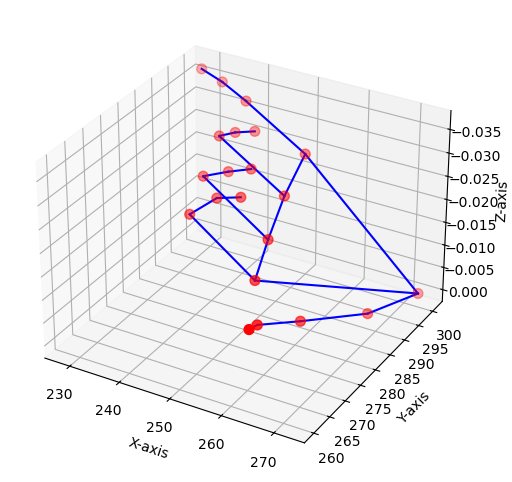

In [30]:
sample = data.iloc[5, :-1] 
x_values = sample[::3].values  
y_values = sample[1::3].values  
z_values = sample[2::3].values  

hand_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4), 
    (0, 5), (5, 6), (6, 7), (7, 8),  
    (5, 9), (9, 10), (10, 11), (11, 12), 
    (9, 13), (13, 14), (14, 15), (15, 16), 
    (0, 17), (13, 17), (17, 18), (18, 19), (19, 20) 
]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x_values, y_values, z_values, color='red', s=50, label="Landmarks")

for connection in hand_connections:
    ax.plot(
        [x_values[connection[0]], x_values[connection[1]]],
        [y_values[connection[0]], y_values[connection[1]]],
        [z_values[connection[0]], z_values[connection[1]]],
        color='blue'
    )

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

ax.invert_zaxis()

plt.show()


In [51]:
data.head(5)

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [3]:
data = data.drop(columns=[col for col in data.columns if 'z' in col])

2D 

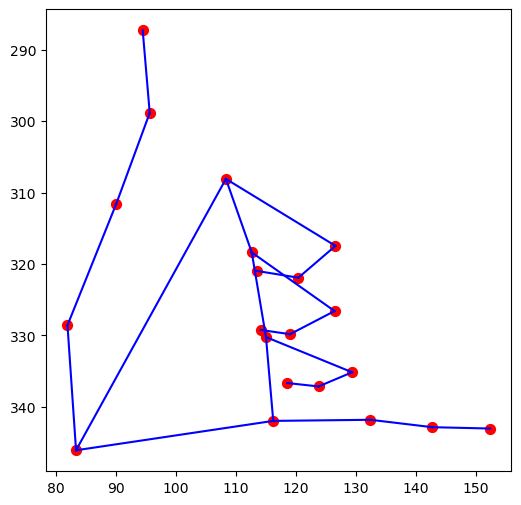

In [12]:
sample = data.iloc[1, :-1]  
x_values = sample[::2].values 
y_values = sample[1::2].values  
hand_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4), 
    (0, 5), (5, 6), (6, 7), (7, 8),  
    (5, 9), (9, 10), (10, 11), (11, 12), 
    (9, 13), (13, 14), (14, 15), (15, 16), 
    (0, 17), (13, 17), (17, 18), (18, 19), (19, 20) 
]
plt.figure(figsize=(6, 6))
plt.scatter(x_values, y_values, color='red', s=50, label="Landmarks")
for connection in hand_connections:
    plt.plot(
        [x_values[connection[0]], x_values[connection[1]]],
        [y_values[connection[0]], y_values[connection[1]]],
        color='blue'
    )
plt.gca().invert_yaxis()
plt.show()


### Encoding labels

In [4]:
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["label"])

In [6]:
data["label"].value_counts()

label
15    1653
8     1649
3     1634
6     1592
13    1567
0     1506
10    1497
12    1482
11    1458
14    1456
9     1441
4     1436
17    1371
16    1343
1     1295
7     1263
5     1087
2      945
Name: count, dtype: int64

In [26]:
data.isna().sum()

x1       0
y1       0
z1       0
x2       0
y2       0
        ..
z20      0
x21      0
y21      0
z21      0
label    0
Length: 64, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [27]:
data.duplicated().sum()

0

In [28]:
data.shape

(25675, 64)

# Split The Data

In [17]:
features=data.iloc[:,:-1]
labels=data.iloc[:,-1]

Split data to train & test

In [55]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.1, random_state=42, stratify=labels)

In [56]:
MM_scaler = MinMaxScaler()
features_train = MM_scaler.fit_transform(features_train)
features_test = MM_scaler.transform(features_test)

In [57]:
joblib.dump(MM_scaler, "MMscale.pkl")

['MMscale.pkl']

In [19]:
st_scaler = StandardScaler()
features_train = st_scaler.fit_transform(features_train)
features_test = st_scaler.transform(features_test)

In [20]:
joblib.dump(st_scaler, "stscale.pkl")

['stscale.pkl']

# RandomForestClassifier with Grid Search

In [48]:

param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(features_train, labels_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

RandomForestClassifier best hyperparameters

In [49]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Validation Accuracy:", grid_search_rf.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Validation Accuracy: 0.8147354754949692


RandomForestClassifier best model Train

In [19]:
random_forest_classifier =RandomForestClassifier(n_estimators=300,max_depth=30)
random_forest_classifier.fit(features_train, labels_train)

RandomForestClassifier(max_depth=30, n_estimators=300)

Test

In [20]:
test_predictions = random_forest_classifier.predict(features_test)
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8571


# SVC with Grid Search

In [62]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 50, 100, 200], 
    'gamma': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 'scale', 'auto'],
    'kernel': ['rbf', 'poly', 'sigmoid'],
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(features_train, labels_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100, 200],
                         'gamma': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 'scale',
                                   'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [63]:
print("Best Parameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 200, 'gamma': 'scale', 'kernel': 'poly'}
Best Validation Accuracy: 0.9764573353393642


SVC best model

In [64]:
svm_model = SVC(C=200,gamma='scale', kernel='poly')  
svm_model.fit(features_train, labels_train)

SVC(C=200, kernel='poly')

Test

In [65]:
test_predictions = svm_model.predict(features_test)
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9790


Confusion Matrix

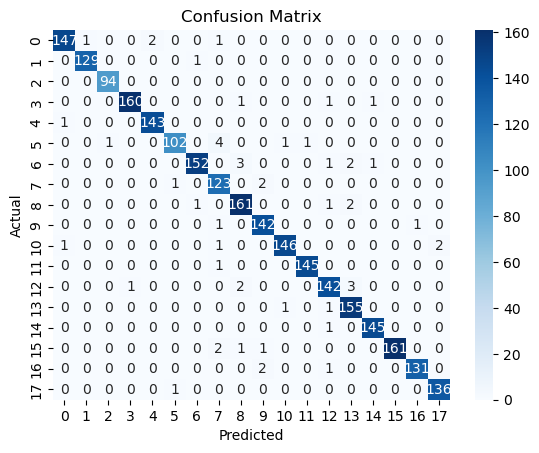

In [70]:
cm = confusion_matrix(labels_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Save the SVC best weights

In [66]:
joblib.dump(svm_model, "SVM_model.pkl")

['SVM_model.pkl']

Load the model

In [68]:
svm = joblib.load("svm_model.pkl")

Test the loaded model

In [69]:
test_predictions = svm.predict(features_test)
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9790


# XGBClassifier with Grid Seatch

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(objective='multi:softmax', num_class=18, eval_metric='mlogloss', use_label_encoder=False)

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(features_train, labels_train)

c:\Users\AT Once\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:50:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=18, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

XGB best hyperparameter

In [24]:
print("Best Parameters:", grid_search.best_params_)
print("Best Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best Validation Accuracy: 0.9165206101914963


XGBClassifier best model


In [39]:
xgb_model = XGBClassifier(
    colsample_bytree=1.0, 
    gamma=0, 
    learning_rate=0.2, 
    max_depth=5, 
    n_estimators=500, 
    subsample=0.8,
    objective='multi:softmax', 
    num_class=18, 
    eval_metric='mlogloss', 
    use_label_encoder=False
)

xgb_model.fit(features_train, labels_train)

c:\Users\AT Once\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:48:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None, num_class=18, ...)

Test

In [46]:
test_predictions = xgb_model.predict(features_test)
test_accuracy = accuracy_score(labels_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8878


In [41]:
joblib.dump(xgb_model, "xgb_model.pkl")

['xgb_model.pkl']

# ExtraTreesClassifier with Grid Search

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [10, 20, 30, None],     
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 4]         
}
grid_search_etc = GridSearchCV(ExtraTreesClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_etc.fit(features_train, labels_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

ExtraTreesClassifier best hyperparameters

In [10]:
print("Best Parameters:", grid_search_etc.best_params_)
print("Best Validation Accuracy:", grid_search_etc.best_score_)

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Validation Accuracy: 0.817332035053554


# KNN with Grid Search

In [12]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(features_train, labels_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

KNN best hyperparameters

In [13]:
print("Best Parameters:", grid_search_knn.best_params_)
print("Best Validation Accuracy:", grid_search_knn.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Validation Accuracy: 0.6495293735800065


# Deployment

In [71]:
svm_model = joblib.load("SVM_model.pkl")
scaler = joblib.load("stscale.pkl") 

hagrid_classes = {
    0: "call", 1: "dislike", 2: "fist", 3: "four", 4: "like",
    5: "mute", 6: "ok", 7: "one", 8: "palm", 9: "peace",
    10: "peace inv.", 11: "rock", 12: "stop", 13: "stop inv.",
    14: "three", 15: "three 2", 16: "two up", 17: "two up inv."
}

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.7,
)
mp_drawing = mp.solutions.drawing_utils

video_path = "Video.mp4"
cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(cv2.CAP_PROP_FPS))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

output_path = "Video_output.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

progress_bar = tqdm(total=total_frames, desc="Processing Video", unit="frame")

feature_names = [f"x{i//2+1}" if i % 2 == 0 else f"y{i//2+1}" for i in range(42)]

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = hands.process(frame_rgb)

    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            keypoints = []
            for lm in hand_landmarks.landmark:
                keypoints.extend([lm.x * frame_width, lm.y * frame_height])  

            keypoints_array = np.array(keypoints).reshape(1, -1)
            if keypoints_array.shape[1] == 42:
                keypoints_scaled = scaler.transform(keypoints_array)  

                keypoints_df = pd.DataFrame(keypoints_scaled, columns=feature_names)

                prediction_idx = svm_model.predict(keypoints_df)[0]
                predicted_class = hagrid_classes.get(int(prediction_idx), "Unknown")

                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                cv2.putText(frame, predicted_class, (50, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    out.write(frame)
    progress_bar.update(1)
cap.release()
out.release()
progress_bar.close()


Processing Video:   0%|          | 0/695 [00:00<?, ?frame/s]c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
Processing Video:   0%|          | 1/695 [00:00<01:32,  7.53frame/s]c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\AT Once\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\A